In [283]:
import pandas as pd

import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
phones=pd.read_csv("mobiles.csv")

In [285]:
phones

,Unnamed: 0,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,0,realme,Champion Gold,64.0,4.6,6.74,5000.0,"₹10,999"
1,1,realme,Champion Black,64.0,NaN,6.74,5000.0,"₹10,999"
2,2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,"₹13,999"
3,3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,"₹13,999"
4,4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,"₹15,999"
...,...,...,...,...,...,...,...,...
955,955,SAMSUNG,Prism Silver,128.0,NaN,6.50,6000.0,"₹19,900"
956,956,OPPO,Sunset Orange,64.0,NaN,6.56,5000.0,"₹14,980"
957,957,OnePlus,Forest Green,256.0,4.1,6.70,5000.0,"₹35,499"
958,958,APPLE,Starlight,512.0,4.7,6.10,NaN,"₹89,999"


In [286]:
phones.shape

(960, 8)

In [287]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   960 non-null    int64  
 1   Brand        960 non-null    object 
 2   Color        931 non-null    object 
 3   Storage      958 non-null    float64
 4   Rating       940 non-null    float64
 5   Screen_size  957 non-null    float64
 6   Battery      901 non-null    float64
 7   Price        960 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 60.1+ KB


In [288]:
phones[phones.duplicated()]

,Unnamed: 0,Brand,Color,Storage,Rating,Screen_size,Battery,Price


In [289]:
phones.head()

,Unnamed: 0,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,0,realme,Champion Gold,64.0,4.6,6.74,5000.0,"₹10,999"
1,1,realme,Champion Black,64.0,NaN,6.74,5000.0,"₹10,999"
2,2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,"₹13,999"
3,3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,"₹13,999"
4,4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,"₹15,999"


In [290]:
phones=phones.drop("Unnamed: 0",axis=1)

In [291]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Champion Gold,64.0,4.6,6.74,5000.0,"₹10,999"
1,realme,Champion Black,64.0,NaN,6.74,5000.0,"₹10,999"
2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,"₹13,999"
3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,"₹13,999"
4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,"₹15,999"
...,...,...,...,...,...,...,...
955,SAMSUNG,Prism Silver,128.0,NaN,6.50,6000.0,"₹19,900"
956,OPPO,Sunset Orange,64.0,NaN,6.56,5000.0,"₹14,980"
957,OnePlus,Forest Green,256.0,4.1,6.70,5000.0,"₹35,499"
958,APPLE,Starlight,512.0,4.7,6.10,NaN,"₹89,999"


In [292]:
phones["Price"]=phones["Price"].replace("[^\d+]","",regex=True).astype("int")

In [293]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        960 non-null    object 
 1   Color        931 non-null    object 
 2   Storage      958 non-null    float64
 3   Rating       940 non-null    float64
 4   Screen_size  957 non-null    float64
 5   Battery      901 non-null    float64
 6   Price        960 non-null    int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 48.9+ KB


In [294]:
phones["Storage"]=phones["Storage"].astype("int",errors="ignore")

In [295]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        960 non-null    object 
 1   Color        931 non-null    object 
 2   Storage      958 non-null    float64
 3   Rating       940 non-null    float64
 4   Screen_size  957 non-null    float64
 5   Battery      901 non-null    float64
 6   Price        960 non-null    int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 48.9+ KB


In [296]:
phones.isnull().sum()

Brand           0
Color          29
Storage         2
Rating         20
Screen_size     3
Battery        59
Price           0
dtype: int64

In [297]:
phones[phones["Color"].isna()]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
47,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,14990
69,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,14990
136,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,17890
163,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,13990
169,REDMI,NaN,128.0,4.1,6.71,5000.0,10220
191,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,13990
193,REDMI,NaN,128.0,4.1,6.71,5000.0,10220
210,SAMSUNG,NaN,128.0,4.2,6.60,6000.0,16990
273,APPLE,NaN,64.0,4.3,4.70,NaN,32699
386,Tecno,NaN,128.0,NaN,6.60,5000.0,11699


In [298]:
phones["Color"].unique()

array(['Champion Gold', 'Champion Black', 'Marine Blue', 'Glimmer Black',
       'Aurora Gold', 'Atlantic Green', 'Blue Tide', 'Mineral Gray',
       'Waterfall Blue', 'Power Black', 'Midnight', 'Frosted Blue',
       'Light Green', 'Dark Blue', 'Jaguar Black', 'Cool Blue',
       'Peppy Purple', 'Yellow', 'Nitro Blaze', 'Velocity Wave',
       'GOAT Green', 'Black Dusk', 'Flashy Black', 'Purple',
       'Midnight Gray', 'Aqua Blue', 'Starlight', 'Sunrise Copper',
       'Copper Blush', 'Forest Green', 'Nebula Green', 'Nightsky Green',
       'Playful Green', 'Midnight Blue', 'Wildcat Blue', nan,
       'Rainforest', 'Lucent White', 'Rainy Night', 'Sunshower',
       'Astral Black', 'Dark Matter', 'OMG Black', 'Horizon Blue',
       'Aurora Blue', 'Supernova Green', 'Stellar Green', 'Sunset Gold',
       'Hyperspace', 'Nebula Blue', 'Lunar Black', 'Frosted Green',
       'Interstellar Blue', 'Prime Black', 'Matte Black', 'Prime Blue',
       'Blue', 'Sunrise Gold', 'Mystique Blue', 'Fe

In [299]:
phones["Color"].nunique()

348

In [300]:
phones["Color"].value_counts()

Black               20
Blue                12
Yellow              12
Midnight Blue       12
White               11
                    ..
Pearl Blue           1
Hazel                1
Aquamarine Green     1
Cosmic Purple        1
Mars Orange          1
Name: Color, Length: 348, dtype: int64

In [301]:
phones.groupby("Brand")

In [302]:
for i in phones.groupby("Brand")["Color"]:
    print(i)

('APPLE', 16        Midnight
32          Purple
36       Starlight
71        Midnight
95            Blue
101       Midnight
110      Starlight
126          Green
158           Blue
168           Pink
178      Starlight
218       Midnight
224         Yellow
273            NaN
291      Starlight
296          White
321          Black
328          White
336          Black
345      Starlight
362       Midnight
373      Starlight
375       Midnight
401       Midnight
405       Midnight
413           Blue
455         Yellow
458            NaN
487            NaN
496         Yellow
502      Starlight
514            NaN
523       Midnight
543         Purple
550           Blue
572           Blue
575           Gold
624         Silver
628    Space Black
645    Space Black
674          Green
685         Silver
696         Silver
700          White
723    Deep Purple
729            Red
741       Midnight
745      Starlight
752         Purple
756       Midnight
762          Green
794         Yellow
83

In [303]:
phones["Color"]=phones.groupby("Brand")["Color"].transform(lambda x:x.fillna(x.mode().iloc[0]))

In [304]:
phones.isnull().sum()

Brand           0
Color           0
Storage         2
Rating         20
Screen_size     3
Battery        59
Price           0
dtype: int64

In [305]:
phones.groupby("Brand")["Color"].transform(lambda x:x.fillna(x.mode().iloc[0]))

0       Champion Gold
1      Champion Black
2         Marine Blue
3       Glimmer Black
4         Marine Blue
            ...      
955      Prism Silver
956     Sunset Orange
957      Forest Green
958         Starlight
959       Mars Orange
Name: Color, Length: 960, dtype: object

<AxesSubplot:ylabel='Frequency'>

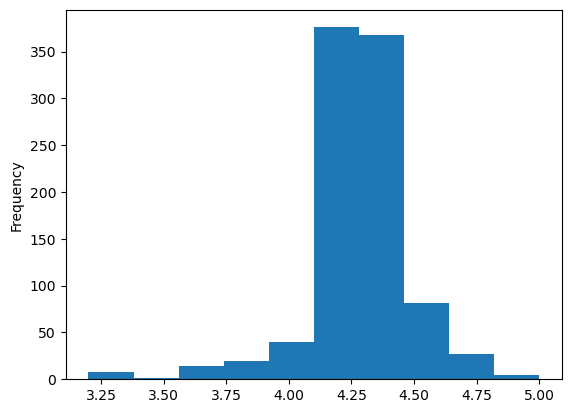

In [306]:
phones["Rating"].plot(kind="hist")

<AxesSubplot:>

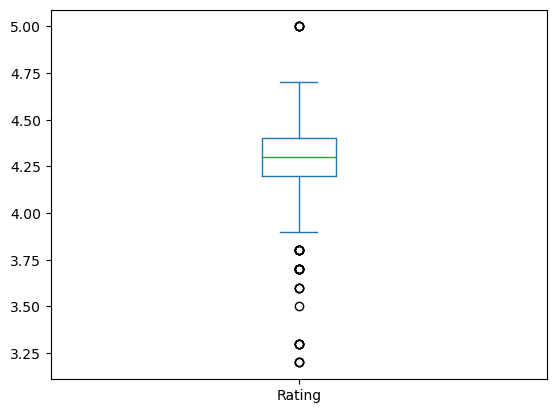

In [307]:
phones["Rating"].plot(kind="box")

In [308]:
phones["Rating"].mean()

4.259680851063824

In [309]:
phones["Rating"].median()

4.3

In [310]:
phones["Rating"].fillna(phones["Rating"].median(),inplace=True)

In [311]:
phones.isnull().sum()

Brand           0
Color           0
Storage         2
Rating          0
Screen_size     3
Battery        59
Price           0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

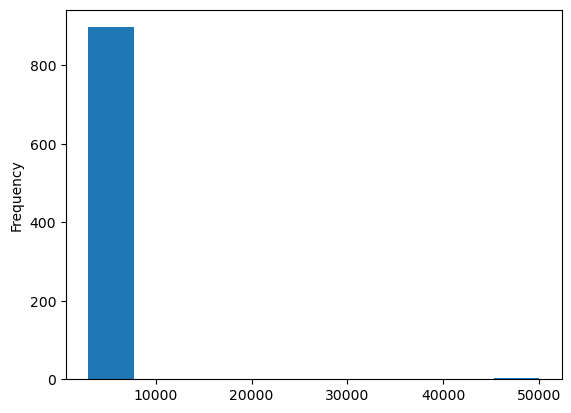

In [312]:
phones["Battery"].plot(kind="hist")

<AxesSubplot:>

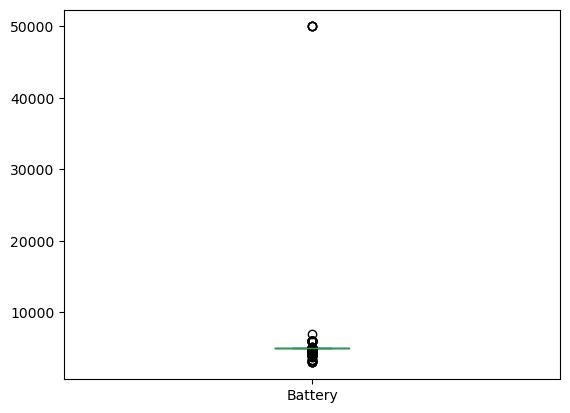

In [313]:
phones["Battery"].plot(kind="box")

In [314]:
phones["Battery"]

0      5000.0
1      5000.0
2      5000.0
3      5000.0
4      5000.0
        ...  
955    6000.0
956    5000.0
957    5000.0
958       NaN
959    5000.0
Name: Battery, Length: 960, dtype: float64

In [315]:
phones[phones["Battery"]<10000]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Champion Gold,64.0,4.6,6.74,5000.0,10999
1,realme,Champion Black,64.0,4.3,6.74,5000.0,10999
2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,13999
3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,13999
4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,15999
...,...,...,...,...,...,...,...
954,realme,Drifting White,128.0,4.3,6.62,5000.0,36999
955,SAMSUNG,Prism Silver,128.0,4.3,6.50,6000.0,19900
956,OPPO,Sunset Orange,64.0,4.3,6.56,5000.0,14980
957,OnePlus,Forest Green,256.0,4.1,6.70,5000.0,35499


In [316]:
phones["Battery"]=phones["Battery"].replace(50000.0,5000.0)

<AxesSubplot:ylabel='Frequency'>

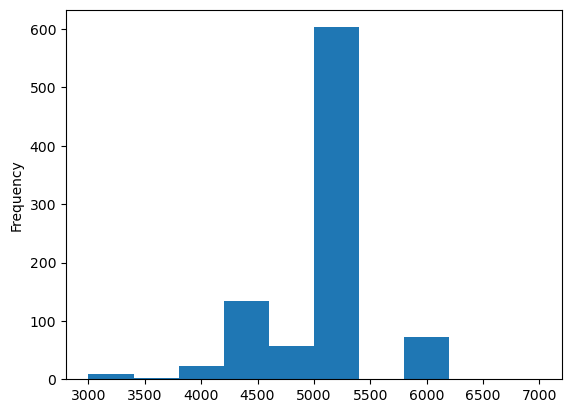

In [317]:
phones["Battery"].plot(kind="hist")

<AxesSubplot:>

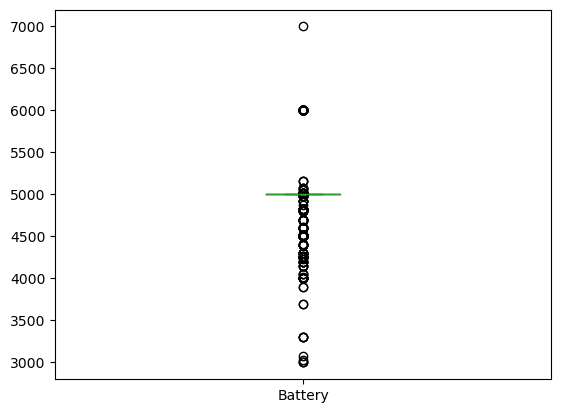

In [318]:
phones["Battery"].plot(kind="box")

In [319]:
phones[phones["Battery"]==5000.0]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Champion Gold,64.0,4.6,6.74,5000.0,10999
1,realme,Champion Black,64.0,4.3,6.74,5000.0,10999
2,vivo,Marine Blue,128.0,4.4,6.58,5000.0,13999
3,vivo,Glimmer Black,128.0,4.4,6.58,5000.0,13999
4,vivo,Marine Blue,128.0,4.3,6.58,5000.0,15999
...,...,...,...,...,...,...,...
953,SAMSUNG,Copper,64.0,4.1,6.50,5000.0,11399
954,realme,Drifting White,128.0,4.3,6.62,5000.0,36999
956,OPPO,Sunset Orange,64.0,4.3,6.56,5000.0,14980
957,OnePlus,Forest Green,256.0,4.1,6.70,5000.0,35499


In [320]:
phones["Battery"].mean()

4941.798002219756

In [321]:
phones["Battery"].mode()

0    5000.0
Name: Battery, dtype: float64

In [322]:
phones.groupby("Brand")

In [323]:
phones[phones["Battery"].isna()]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
16,APPLE,Midnight,128.0,4.6,6.1,NaN,68999
32,APPLE,Purple,128.0,4.6,6.1,NaN,68999
36,APPLE,Starlight,128.0,4.6,6.1,NaN,68999
71,APPLE,Midnight,128.0,4.7,6.1,NaN,59999
95,APPLE,Blue,128.0,4.6,6.1,NaN,68999
101,APPLE,Midnight,128.0,4.7,6.1,NaN,59999
110,APPLE,Starlight,128.0,4.7,6.1,NaN,59999
126,APPLE,Green,128.0,4.7,6.1,NaN,59999
158,APPLE,Blue,128.0,4.7,6.1,NaN,59999
168,APPLE,Pink,128.0,4.7,6.1,NaN,59999


In [324]:
phones[phones["Battery"].isna()]["Price"].value_counts()

59999     6
78999     6
68999     5
76999     5
53999     5
69999     4
127999    4
46599     3
32699     3
44999     2
41999     2
37999     2
120999    2
98999     2
89999     2
40999     1
130999    1
86999     1
106999    1
137999    1
40990     1
Name: Price, dtype: int64

In [325]:
phones["Battery"]=phones["Battery"].fillna(phones["Battery"].median())

In [326]:
phones.isnull().sum()

Brand          0
Color          0
Storage        2
Rating         0
Screen_size    3
Battery        0
Price          0
dtype: int64

In [327]:
phones=phones.dropna(subset=["Storage","Screen_size"])

In [328]:
phones.isnull().sum()

Brand          0
Color          0
Storage        0
Rating         0
Screen_size    0
Battery        0
Price          0
dtype: int64

In [329]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        955 non-null    object 
 1   Color        955 non-null    object 
 2   Storage      955 non-null    float64
 3   Rating       955 non-null    float64
 4   Screen_size  955 non-null    float64
 5   Battery      955 non-null    float64
 6   Price        955 non-null    int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 56.0+ KB


In [330]:
phones["Battery"]=phones["Battery"].astype("int")

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\3494300282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Battery"]=phones["Battery"].astype("int")


In [331]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        955 non-null    object 
 1   Color        955 non-null    object 
 2   Storage      955 non-null    float64
 3   Rating       955 non-null    float64
 4   Screen_size  955 non-null    float64
 5   Battery      955 non-null    int32  
 6   Price        955 non-null    int32  
dtypes: float64(3), int32(2), object(2)
memory usage: 52.2+ KB


In [332]:
phones["Storage"]=phones["Storage"].astype("int")

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\1561665769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Storage"]=phones["Storage"].astype("int")


In [333]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        955 non-null    object 
 1   Color        955 non-null    object 
 2   Storage      955 non-null    int32  
 3   Rating       955 non-null    float64
 4   Screen_size  955 non-null    float64
 5   Battery      955 non-null    int32  
 6   Price        955 non-null    int32  
dtypes: float64(2), int32(3), object(2)
memory usage: 48.5+ KB


In [334]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Champion Gold,64,4.6,6.74,5000,10999
1,realme,Champion Black,64,4.3,6.74,5000,10999
2,vivo,Marine Blue,128,4.4,6.58,5000,13999
3,vivo,Glimmer Black,128,4.4,6.58,5000,13999
4,vivo,Marine Blue,128,4.3,6.58,5000,15999
...,...,...,...,...,...,...,...
955,SAMSUNG,Prism Silver,128,4.3,6.50,6000,19900
956,OPPO,Sunset Orange,64,4.3,6.56,5000,14980
957,OnePlus,Forest Green,256,4.1,6.70,5000,35499
958,APPLE,Starlight,512,4.7,6.10,5000,89999


In [335]:
phone["Color"].nunique()

NameError: name 'phone' is not defined

In [336]:
phones["Color"]

0       Champion Gold
1      Champion Black
2         Marine Blue
3       Glimmer Black
4         Marine Blue
            ...      
955      Prism Silver
956     Sunset Orange
957      Forest Green
958         Starlight
959       Mars Orange
Name: Color, Length: 955, dtype: object

In [337]:
color=[]
for i in phones["Color"]:
    color.append(i.split()[-1])

In [338]:
phones["Color"]=color

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\1520882060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Color"]=color


In [339]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Gold,64,4.6,6.74,5000,10999
1,realme,Black,64,4.3,6.74,5000,10999
2,vivo,Blue,128,4.4,6.58,5000,13999
3,vivo,Black,128,4.4,6.58,5000,13999
4,vivo,Blue,128,4.3,6.58,5000,15999
...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.50,6000,19900
956,OPPO,Orange,64,4.3,6.56,5000,14980
957,OnePlus,Green,256,4.1,6.70,5000,35499
958,APPLE,Starlight,512,4.7,6.10,5000,89999


In [340]:
phones["Color"].nunique()

81

In [341]:
S1=pd.Series(["10k","256k","1M","50k","15M"])

In [342]:
S1

0     10k
1    256k
2      1M
3     50k
4     15M
dtype: object

In [343]:
S1.replace({"k":"000","M":"000000"},regex=True).astype("int")

0       10000
1      256000
2     1000000
3       50000
4    15000000
dtype: int32

In [344]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Gold,64,4.6,6.74,5000,10999
1,realme,Black,64,4.3,6.74,5000,10999
2,vivo,Blue,128,4.4,6.58,5000,13999
3,vivo,Black,128,4.4,6.58,5000,13999
4,vivo,Blue,128,4.3,6.58,5000,15999
...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.50,6000,19900
956,OPPO,Orange,64,4.3,6.56,5000,14980
957,OnePlus,Green,256,4.1,6.70,5000,35499
958,APPLE,Starlight,512,4.7,6.10,5000,89999


In [345]:
phones['Color'].value_counts()

Black         236
Blue          209
Green          99
White          61
Gold           34
             ... 
waves           1
Pink            1
Lemongrass      1
Dream           1
Pearl           1
Name: Color, Length: 81, dtype: int64

In [347]:
phones["Color"].value_counts()

Black         236
Blue          209
Green          99
White          61
Gold           34
             ... 
waves           1
Pink            1
Lemongrass      1
Dream           1
Pearl           1
Name: Color, Length: 81, dtype: int64

In [349]:
phones["Color"].nunique()

81

In [351]:
phones["Color"]=phones["Color"].str.title()

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\243996618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Color"]=phones["Color"].str.title()


In [352]:
phones["Color"].nunique()

71

In [354]:
phones["Storage"].value_counts()

128    550
64     212
256    164
32      12
512     11
6        4
8        1
4        1
Name: Storage, dtype: int64

In [357]:
phones=phones[phones["Storage"]>32]

In [358]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Gold,64,4.6,6.74,5000,10999
1,realme,Black,64,4.3,6.74,5000,10999
2,vivo,Blue,128,4.4,6.58,5000,13999
3,vivo,Black,128,4.4,6.58,5000,13999
4,vivo,Blue,128,4.3,6.58,5000,15999
...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.50,6000,19900
956,OPPO,Orange,64,4.3,6.56,5000,14980
957,OnePlus,Green,256,4.1,6.70,5000,35499
958,APPLE,Starlight,512,4.7,6.10,5000,89999


In [359]:
def counts(column):
    return phones[column].value_counts()

In [360]:
counts("Rating")

4.2    279
4.3    249
4.4    134
4.1     85
4.5     54
4.0     39
4.6     28
4.7     27
3.9     11
3.7     11
3.8      8
5.0      5
3.2      3
3.6      2
3.3      1
3.5      1
Name: Rating, dtype: int64

In [361]:
counts("Screen_size")

6.600    141
6.700    129
6.670     95
6.500     73
6.580     53
6.430     45
6.100     44
6.550     37
6.400     35
6.560     32
6.780     32
6.440     27
6.720     24
6.530     22
6.380     19
6.510     19
6.740     13
6.800     12
6.710     11
6.680     11
4.700      9
6.300      7
6.620      6
6.590      6
6.520      5
6.517      4
5.990      4
6.950      4
6.410      3
6.470      2
6.640      2
6.140      2
6.390      2
6.570      2
6.730      1
6.900      1
6.180      1
6.515      1
5.600      1
Name: Screen_size, dtype: int64

In [362]:
counts("Price")

10999    34
16999    34
15999    32
14999    27
29999    25
         ..
11599     1
17315     1
30749     1
14890     1
28762     1
Name: Price, Length: 305, dtype: int64

In [363]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Gold,64,4.6,6.74,5000,10999
1,realme,Black,64,4.3,6.74,5000,10999
2,vivo,Blue,128,4.4,6.58,5000,13999
3,vivo,Black,128,4.4,6.58,5000,13999
4,vivo,Blue,128,4.3,6.58,5000,15999
...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.50,6000,19900
956,OPPO,Orange,64,4.3,6.56,5000,14980
957,OnePlus,Green,256,4.1,6.70,5000,35499
958,APPLE,Starlight,512,4.7,6.10,5000,89999


In [364]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 959
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        937 non-null    object 
 1   Color        937 non-null    object 
 2   Storage      937 non-null    int32  
 3   Rating       937 non-null    float64
 4   Screen_size  937 non-null    float64
 5   Battery      937 non-null    int32  
 6   Price        937 non-null    int32  
dtypes: float64(2), int32(3), object(2)
memory usage: 47.6+ KB


In [371]:
phones["Brand"].value_counts().index

Index(['SAMSUNG', 'REDMI', 'realme', 'vivo', 'APPLE', 'OnePlus', 'POCO',
       'Infinix', 'OPPO', 'Tecno', 'MOTOROLA', 'IQOO', 'Mi', 'Redmi', 'Google',
       'Nokia', 'Xiaomi', 'Nothing', 'Pluzz', 'LAVA'],
      dtype='object')

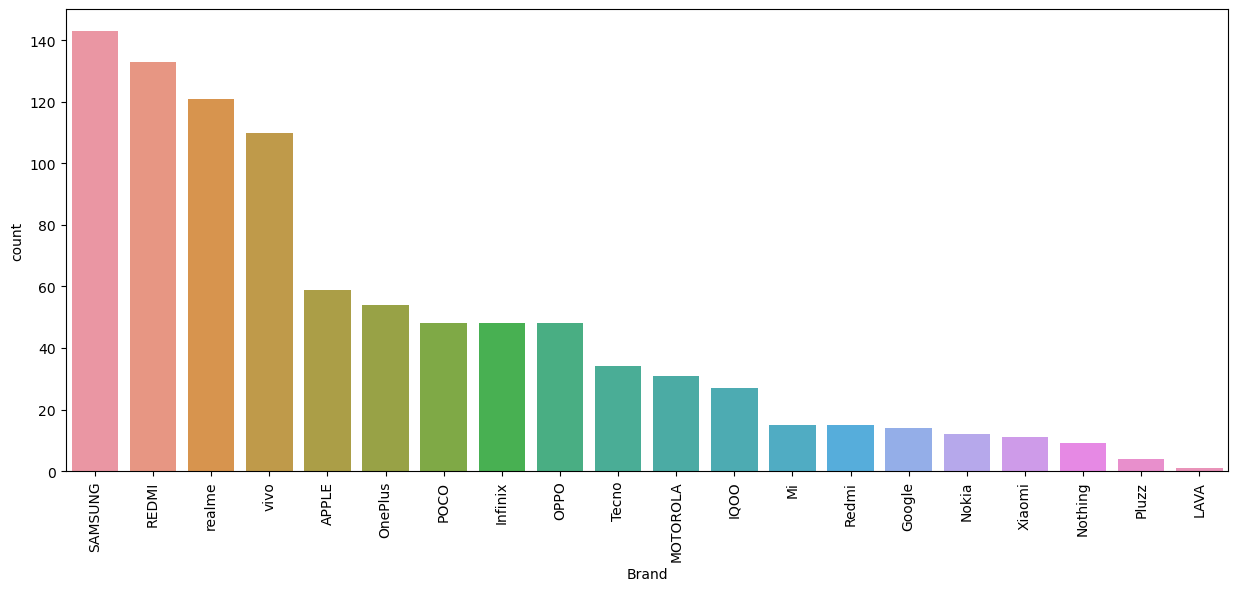

In [375]:
plt.figure(figsize=(15,6))
sns.countplot(x="Brand",data=phones,order=phones["Brand"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#insight

<AxesSubplot:xlabel='Brand'>

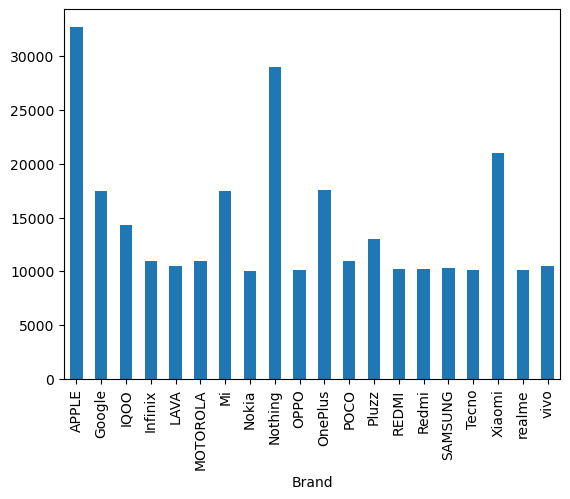

In [378]:
phones.groupby("Brand")["Price"].min().plot(kind="bar")

<AxesSubplot:xlabel='Brand'>

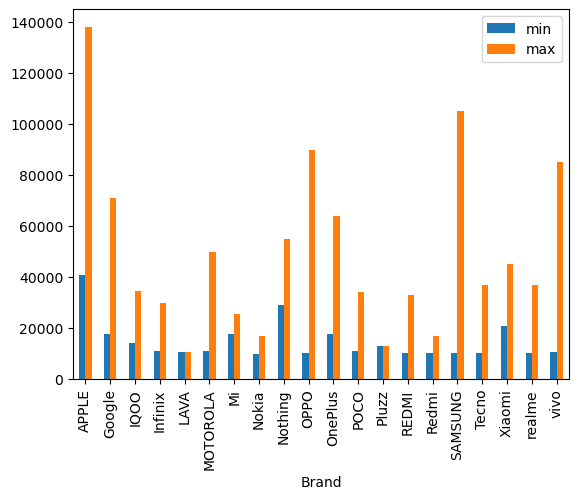

In [447]:
phones.groupby("Brand")["Price"].agg(["min","max"]).plot(kind="bar")

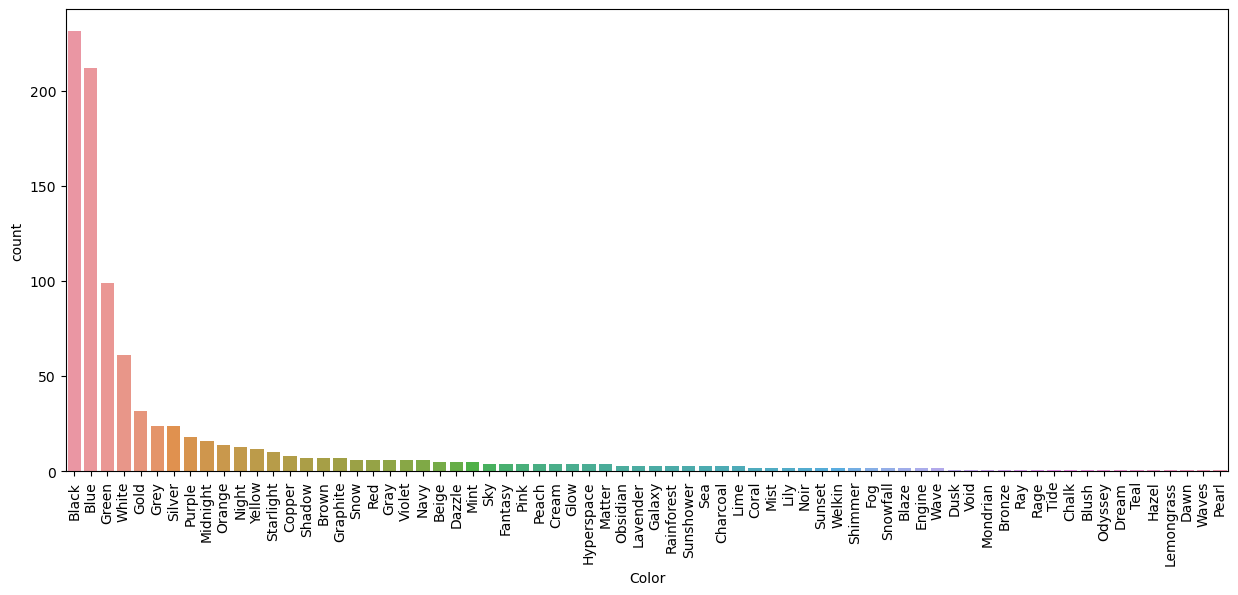

In [381]:
plt.figure(figsize=(15,6))
sns.countplot(x="Color",data=phones,order=phones["Color"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

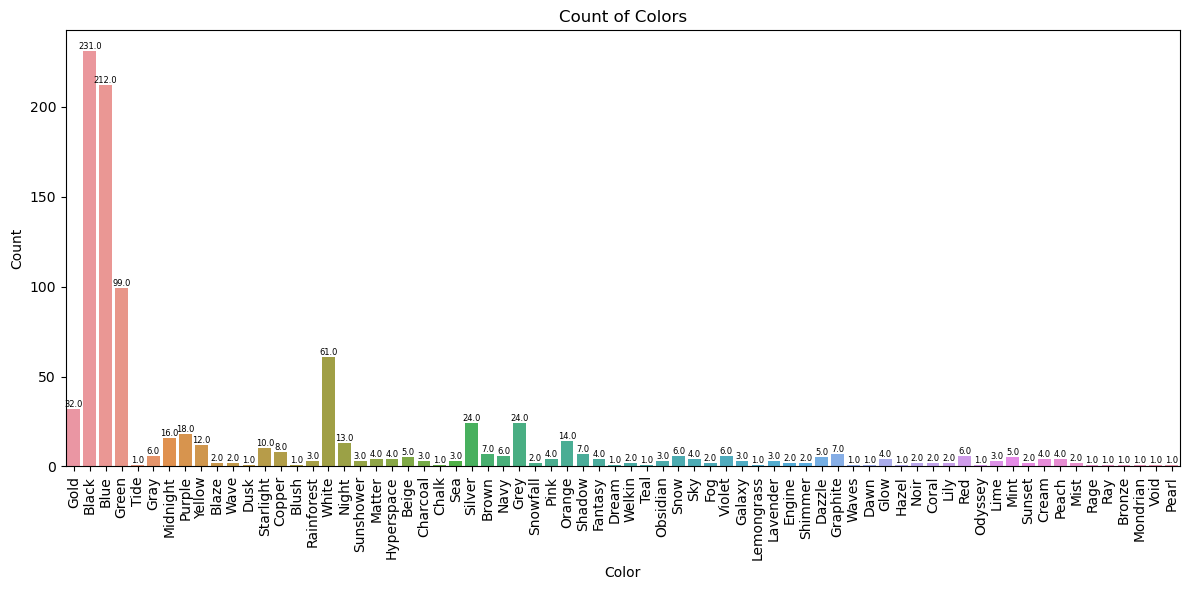

In [382]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=phones, x='Color')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of Colors')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()
plt.show()

In [386]:
phones.groupby("Brand")["Color"].count()

Brand
APPLE        59
Google       14
IQOO         27
Infinix      48
LAVA          1
MOTOROLA     31
Mi           15
Nokia        12
Nothing       9
OPPO         48
OnePlus      54
POCO         48
Pluzz         4
REDMI       133
Redmi        15
SAMSUNG     143
Tecno        34
Xiaomi       11
realme      121
vivo        110
Name: Color, dtype: int64

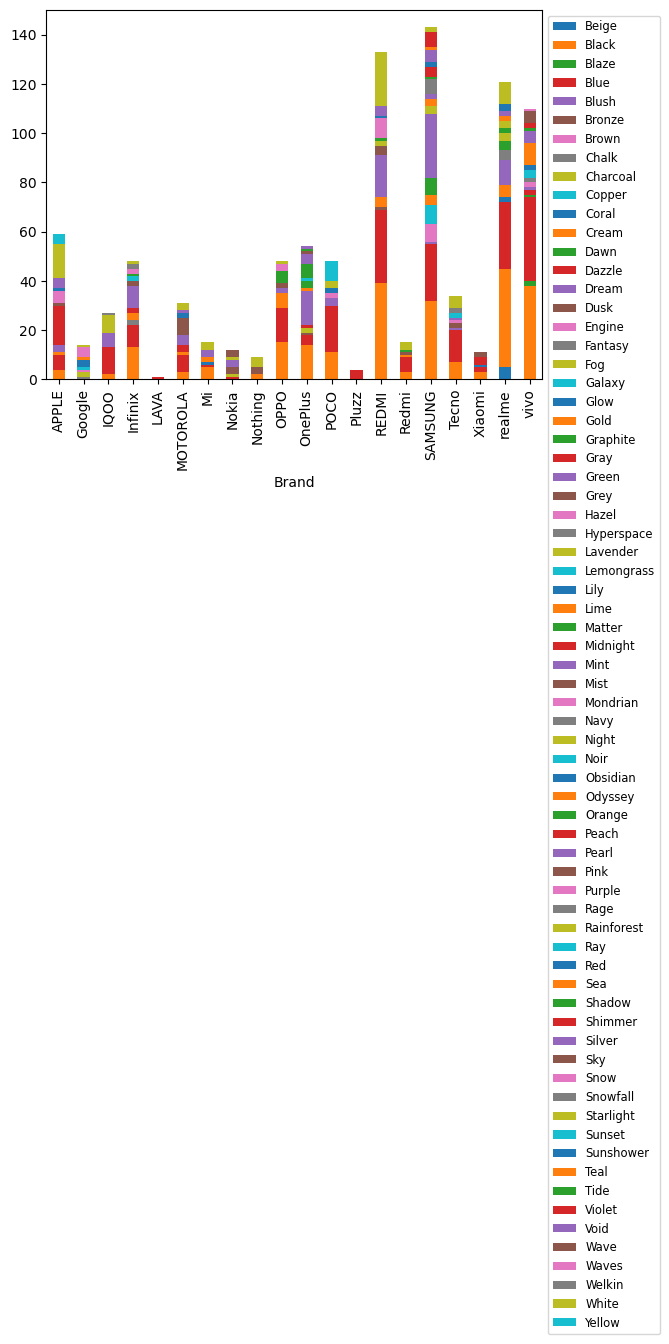

In [431]:
pd.crosstab(index=phones["Brand"],columns=phones["Color"]).plot(kind="bar",stacked=True).legend(bbox_to_anchor=(1,1),fontsize='small')

In [398]:
phones["Color"].value_counts().index[:5]

Index(['Black', 'Blue', 'Green', 'White', 'Gold'], dtype='object')

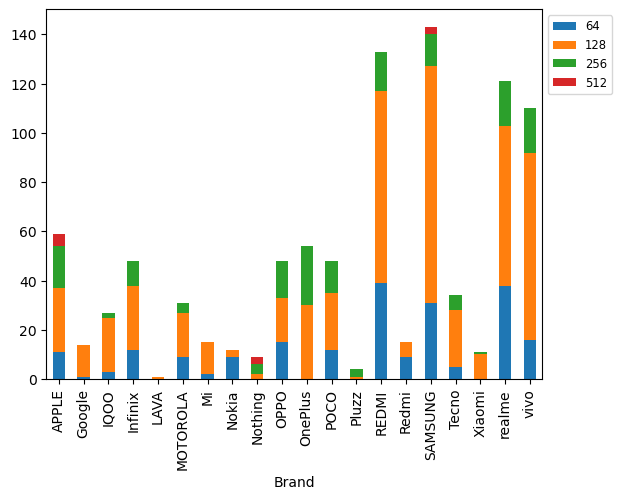

In [409]:
pd.crosstab(index=phones["Brand"],columns=phones["Storage"]).plot(kind="bar",stacked=True).legend(bbox_to_anchor=(1,1),fontsize='small')

In [ ]:
#insight

In [410]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price
0,realme,Gold,64,4.6,6.74,5000,10999
1,realme,Black,64,4.3,6.74,5000,10999
2,vivo,Blue,128,4.4,6.58,5000,13999
3,vivo,Black,128,4.4,6.58,5000,13999
4,vivo,Blue,128,4.3,6.58,5000,15999
...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.50,6000,19900
956,OPPO,Orange,64,4.3,6.56,5000,14980
957,OnePlus,Green,256,4.1,6.70,5000,35499
958,APPLE,Starlight,512,4.7,6.10,5000,89999


In [412]:
phones["Storage"].plot()

128    550
64     212
256    164
512     11
Name: Storage, dtype: int64

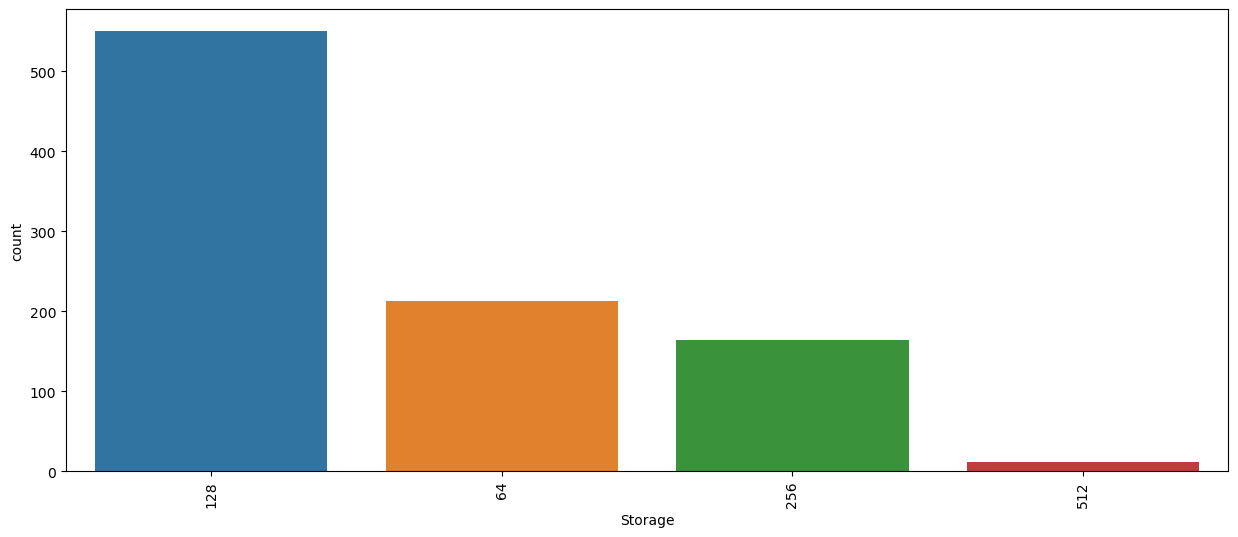

In [411]:
plt.figure(figsize=(15,6))
sns.countplot(x="Storage",data=phones,order=phones["Storage"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

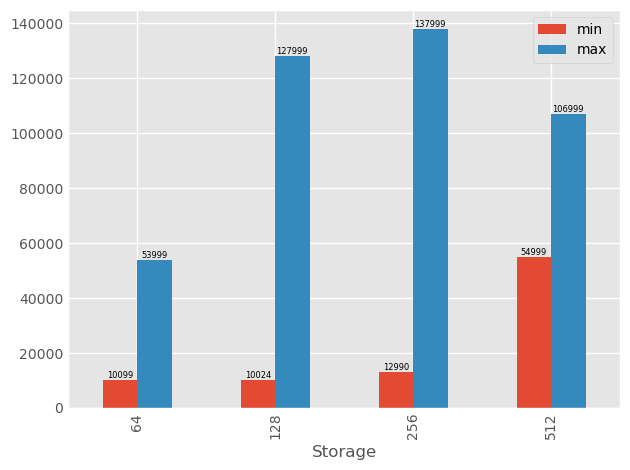

In [472]:
plt.style.use("ggplot")
ax=phones.groupby("Storage")["Price"].agg(["min","max"]).plot(kind="bar")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()
plt.show()

In [468]:
#insights

<AxesSubplot:ylabel='Frequency'>

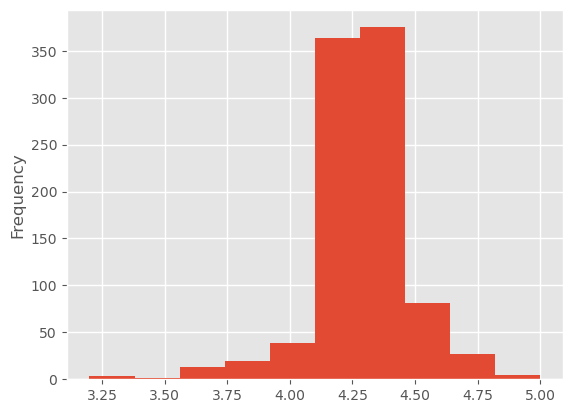

In [462]:
phones["Rating"].plot(kind="hist")

<AxesSubplot:>

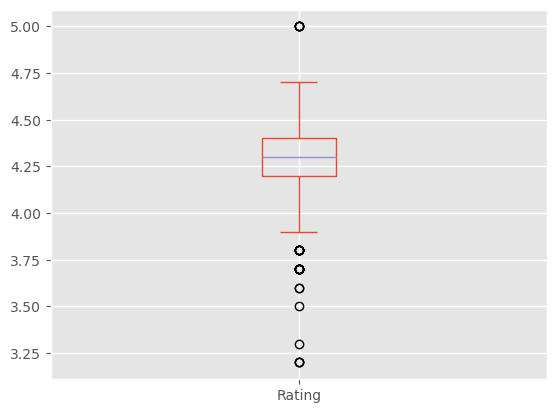

In [463]:
phones["Rating"].plot(kind="box")

In [419]:
phones["Rating_cat"]=pd.cut(phones["Rating"],bins=2,labels=["low","high"])

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\2705271450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Rating_cat"]=pd.cut(phones["Rating"],bins=2,labels=["low","high"])


In [420]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat
0,realme,Gold,64,4.6,6.74,5000,10999,high
1,realme,Black,64,4.3,6.74,5000,10999,high
2,vivo,Blue,128,4.4,6.58,5000,13999,high
3,vivo,Black,128,4.4,6.58,5000,13999,high
4,vivo,Blue,128,4.3,6.58,5000,15999,high
...,...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.50,6000,19900,high
956,OPPO,Orange,64,4.3,6.56,5000,14980,high
957,OnePlus,Green,256,4.1,6.70,5000,35499,low
958,APPLE,Starlight,512,4.7,6.10,5000,89999,high


In [422]:
phones[phones["Rating_cat"]=="low"]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat
12,MOTOROLA,Gray,128,4.1,6.500,5000,11999,low
18,MOTOROLA,Blue,128,4.1,6.550,5000,15499,low
19,SAMSUNG,Green,64,4.1,6.500,5000,10701,low
20,SAMSUNG,Blue,64,4.1,6.500,5000,10701,low
21,POCO,Black,128,4.1,6.670,5000,18999,low
...,...,...,...,...,...,...,...,...
921,SAMSUNG,Orange,128,4.1,6.600,5000,21999,low
939,Nokia,Grey,64,3.7,6.517,5000,10399,low
943,OnePlus,Void,256,4.1,6.430,4500,27999,low
953,SAMSUNG,Copper,64,4.1,6.500,5000,11399,low


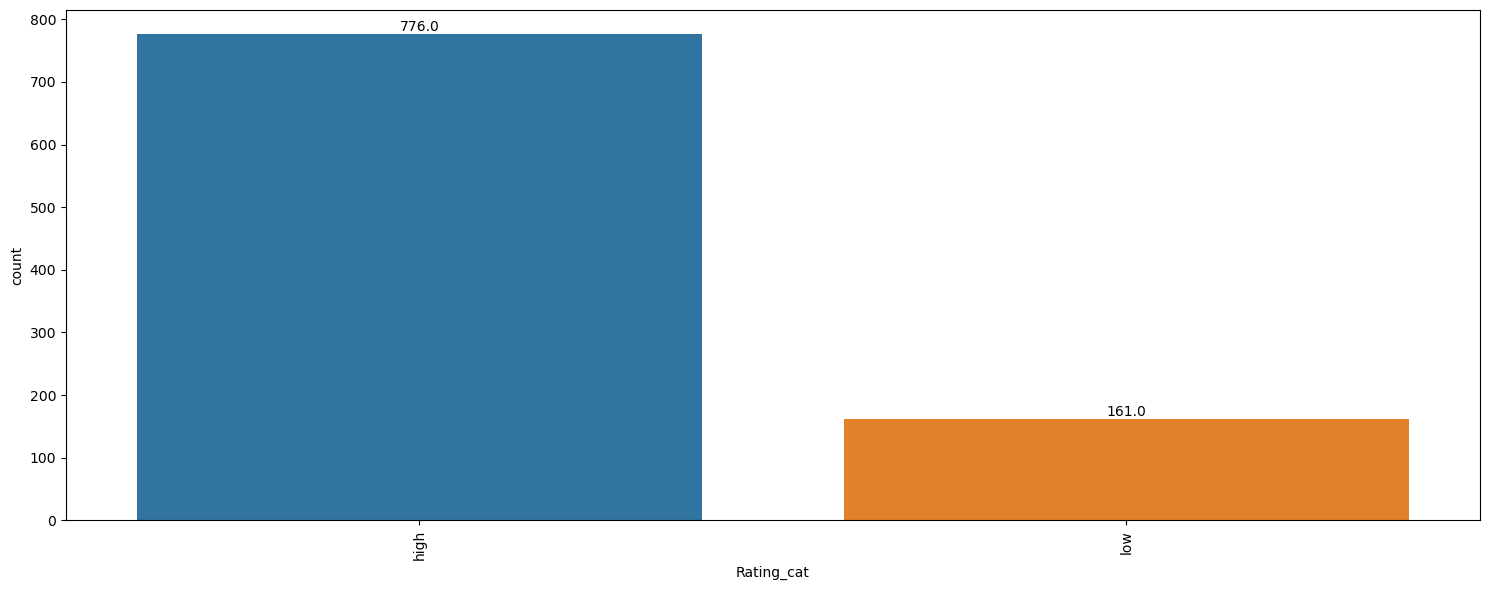

In [425]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x="Rating_cat",data=phones,order=phones["Rating_cat"].value_counts().index)
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()

plt.show()

In [428]:
phones["Rating"].nunique()

16

In [434]:
phones["Screen_size"]=phones["Screen_size"].round(1)

C:\Users\HP\AppData\Local\Temp\ipykernel_2540\1159203639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones["Screen_size"]=phones["Screen_size"].round(1)


In [436]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat
0,realme,Gold,64,4.6,6.7,5000,10999,high
1,realme,Black,64,4.3,6.7,5000,10999,high
2,vivo,Blue,128,4.4,6.6,5000,13999,high
3,vivo,Black,128,4.4,6.6,5000,13999,high
4,vivo,Blue,128,4.3,6.6,5000,15999,high
...,...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.5,6000,19900,high
956,OPPO,Orange,64,4.3,6.6,5000,14980,high
957,OnePlus,Green,256,4.1,6.7,5000,35499,low
958,APPLE,Starlight,512,4.7,6.1,5000,89999,high


<AxesSubplot:ylabel='Frequency'>

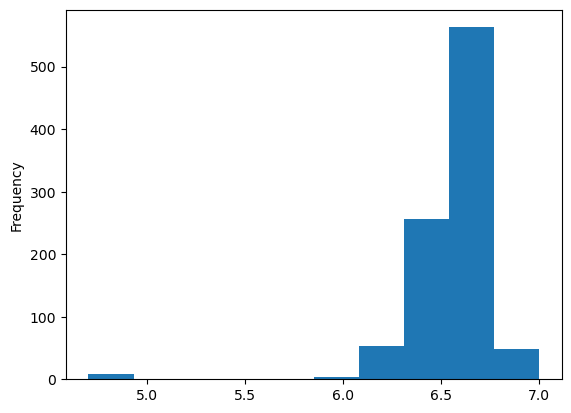

In [437]:
phones["Screen_size"].plot(kind="hist")

<AxesSubplot:>

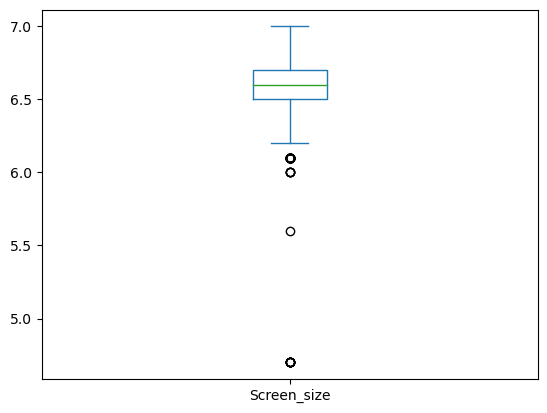

In [438]:
phones["Screen_size"].plot(kind="box")

In [448]:
phones=phones[phones["Screen_size"]>5.0]

In [450]:
phones[phones["Screen_size"]>5.0]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat
0,realme,Gold,64,4.6,6.7,5000,10999,high
1,realme,Black,64,4.3,6.7,5000,10999,high
2,vivo,Blue,128,4.4,6.6,5000,13999,high
3,vivo,Black,128,4.4,6.6,5000,13999,high
4,vivo,Blue,128,4.3,6.6,5000,15999,high
...,...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.5,6000,19900,high
956,OPPO,Orange,64,4.3,6.6,5000,14980,high
957,OnePlus,Green,256,4.1,6.7,5000,35499,low
958,APPLE,Starlight,512,4.7,6.1,5000,89999,high


<AxesSubplot:>

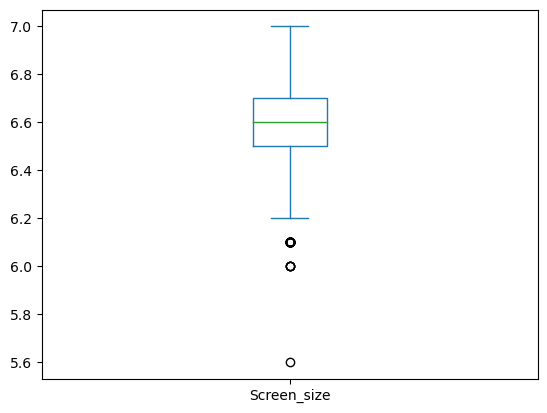

In [443]:
phones["Screen_size"].plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

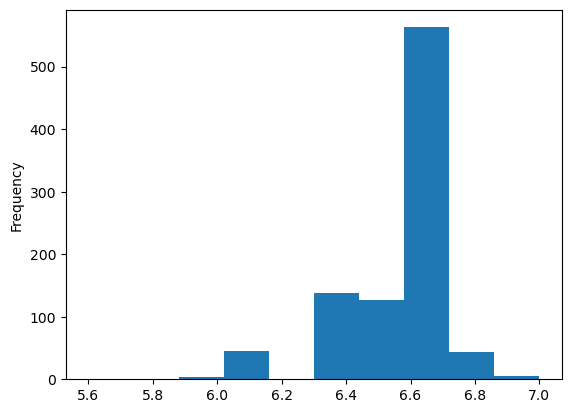

In [444]:
phones["Screen_size"].plot(kind="hist")

In [446]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat
0,realme,Gold,64,4.6,6.7,5000,10999,high
1,realme,Black,64,4.3,6.7,5000,10999,high
2,vivo,Blue,128,4.4,6.6,5000,13999,high
3,vivo,Black,128,4.4,6.6,5000,13999,high
4,vivo,Blue,128,4.3,6.6,5000,15999,high
...,...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.5,6000,19900,high
956,OPPO,Orange,64,4.3,6.6,5000,14980,high
957,OnePlus,Green,256,4.1,6.7,5000,35499,low
958,APPLE,Starlight,512,4.7,6.1,5000,89999,high


In [504]:
phones["Price"].max()

137999

In [505]:
phones["Price"].min()

10024

In [506]:
phones["Price"].skew()

2.71304713223692

<AxesSubplot:ylabel='Frequency'>

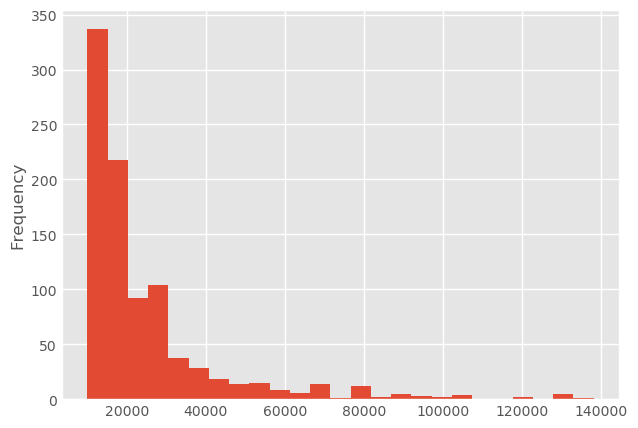

In [509]:
phones["Price"].plot(kind="hist",bins=25)

In [511]:
phones["Price"].mean()

24857.077586206895

<AxesSubplot:>

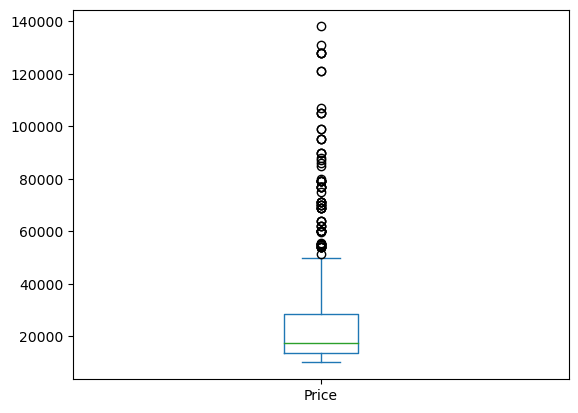

In [515]:
plt.style.use("default")
phones["Price"].plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

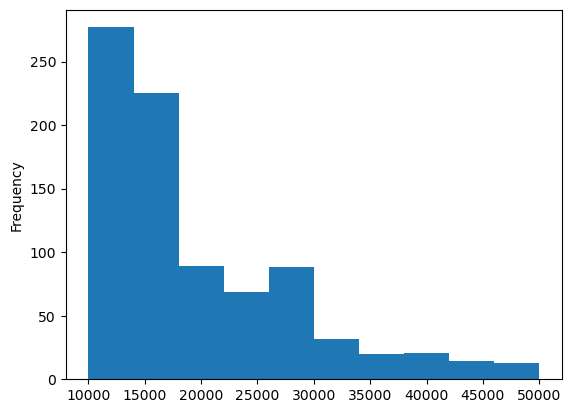

In [519]:
phones[phones["Price"]<50000]["Price"].plot(kind="hist")

In [520]:
#insights

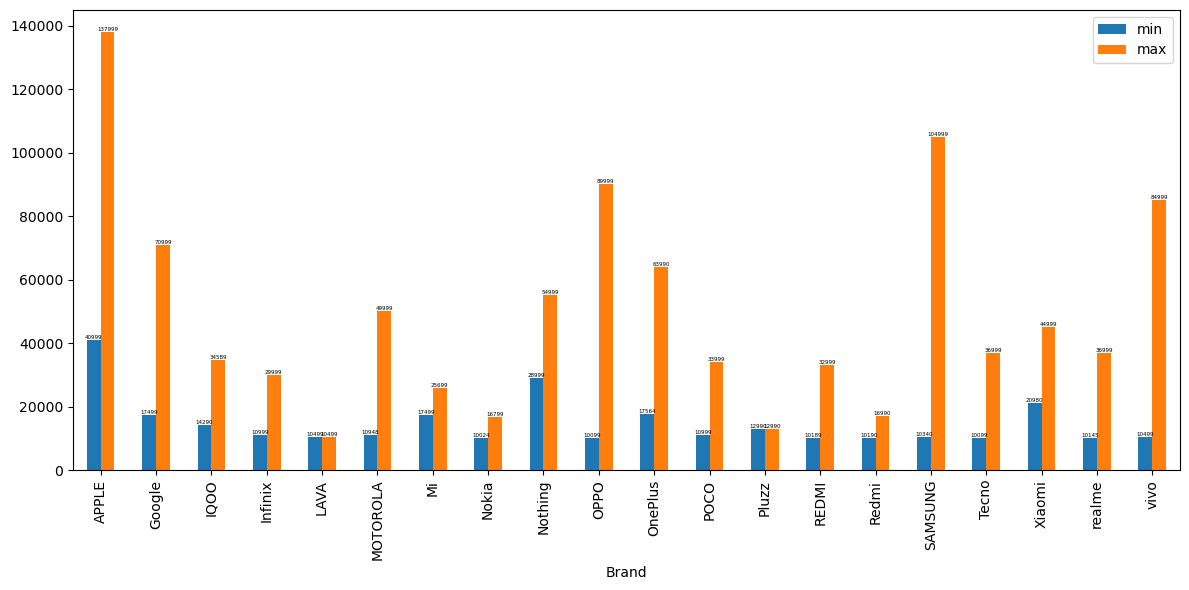

In [526]:
ax=phones.groupby("Brand")["Price"].agg(["min","max"]).plot(kind="bar",figsize=(12,6))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=4, color='black')

plt.tight_layout()
plt.show()

In [529]:
for i in phones.groupby(["Brand","Storage"]):
    print(i)
    print("*****************************************")
    print()

(('APPLE', 64),      Brand   Color  Storage  Rating  Screen_size  Battery  Price Rating_cat
296  APPLE   White       64     4.6          6.1     5000  41999       high
336  APPLE   Black       64     4.6          6.1     5000  40999       high
543  APPLE  Purple       64     4.6          6.1     5000  53999       high
550  APPLE    Blue       64     4.6          6.1     5000  53999       high
674  APPLE   Green       64     4.6          6.1     5000  53999       high
700  APPLE   White       64     4.6          6.1     5000  53999       high
729  APPLE     Red       64     4.6          6.1     5000  53999       high
919  APPLE  Purple       64     4.6          6.1     5000  41999       high)
*****************************************

(('APPLE', 128),      Brand      Color  Storage  Rating  Screen_size  Battery   Price  \
16   APPLE   Midnight      128     4.6          6.1     5000   68999   
32   APPLE     Purple      128     4.6          6.1     5000   68999   
36   APPLE  Starlight  

<AxesSubplot:xlabel='Brand,Storage'>

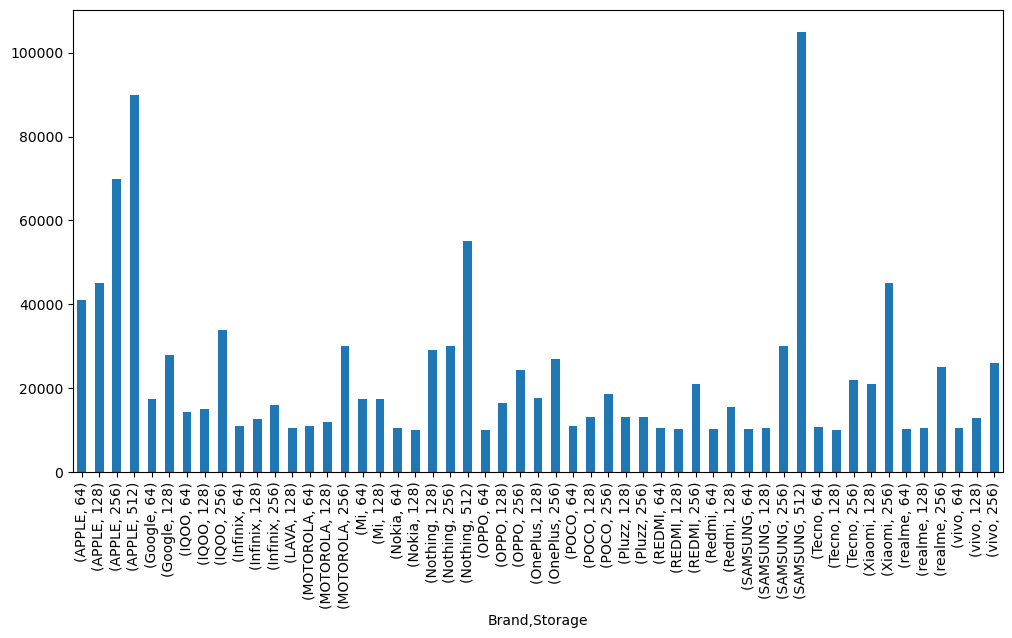

In [531]:
phones.groupby(["Brand","Storage"])["Price"].agg("min").plot(kind="bar",figsize=(12,6))

In [ ]:
phones.groupby(["Brand"])["Price"].agg("min").plot(kind="bar",figsize=(12,6))

In [542]:
phones.groupby(["Brand","Storage"]).get_group(("APPLE",128))

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat
16,APPLE,Midnight,128,4.6,6.1,5000,68999,high
32,APPLE,Purple,128,4.6,6.1,5000,68999,high
36,APPLE,Starlight,128,4.6,6.1,5000,68999,high
71,APPLE,Midnight,128,4.7,6.1,5000,59999,high
95,APPLE,Blue,128,4.6,6.1,5000,68999,high
101,APPLE,Midnight,128,4.7,6.1,5000,59999,high
110,APPLE,Starlight,128,4.7,6.1,5000,59999,high
126,APPLE,Green,128,4.7,6.1,5000,59999,high
158,APPLE,Blue,128,4.7,6.1,5000,59999,high
168,APPLE,Pink,128,4.7,6.1,5000,59999,high


In [550]:
phones["Price_cat"]=phones["Price"].apply(lambda x : "Affordable" if x<18000 else "Average" if x<30000 else "Costly")

In [551]:
phones

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat,Price_cat
0,realme,Gold,64,4.6,6.7,5000,10999,high,Affordable
1,realme,Black,64,4.3,6.7,5000,10999,high,Affordable
2,vivo,Blue,128,4.4,6.6,5000,13999,high,Affordable
3,vivo,Black,128,4.4,6.6,5000,13999,high,Affordable
4,vivo,Blue,128,4.3,6.6,5000,15999,high,Affordable
...,...,...,...,...,...,...,...,...,...
955,SAMSUNG,Silver,128,4.3,6.5,6000,19900,high,Average
956,OPPO,Orange,64,4.3,6.6,5000,14980,high,Affordable
957,OnePlus,Green,256,4.1,6.7,5000,35499,low,Costly
958,APPLE,Starlight,512,4.7,6.1,5000,89999,high,Costly


<AxesSubplot:xlabel='Price_cat', ylabel='count'>

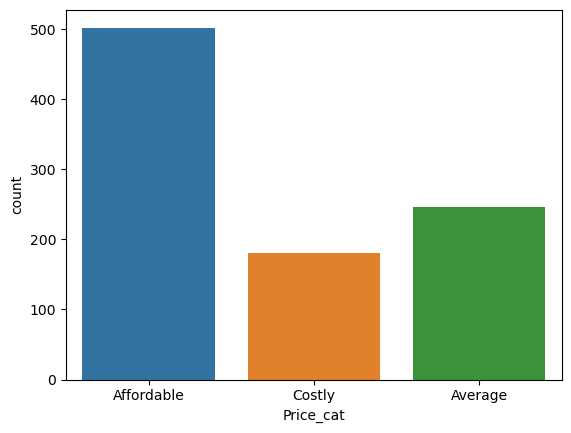

In [552]:
sns.countplot(x=phones["Price_cat"])

<AxesSubplot:xlabel='Price', ylabel='Battery'>

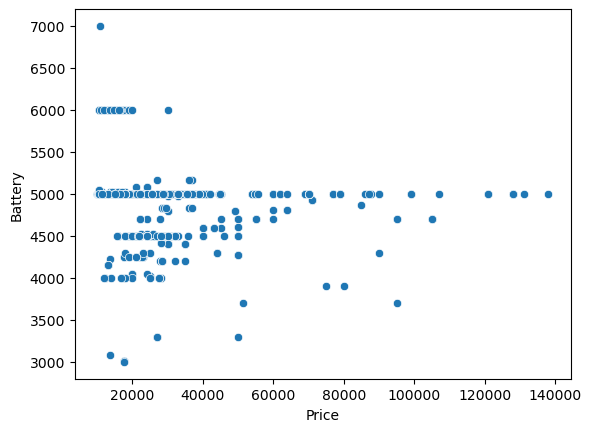

In [555]:
sns.scatterplot(x=phones["Price"],y=phones["Battery"])

<AxesSubplot:>

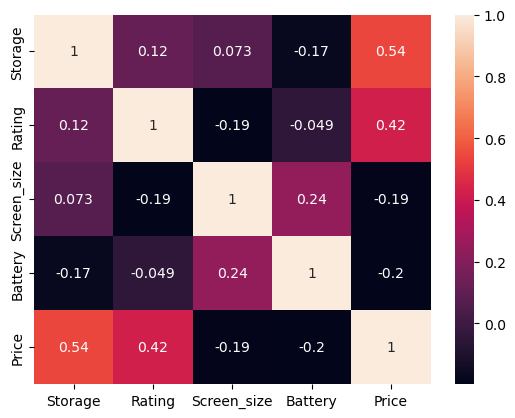

In [556]:
sns.heatmap(phones.corr(),annot=True)

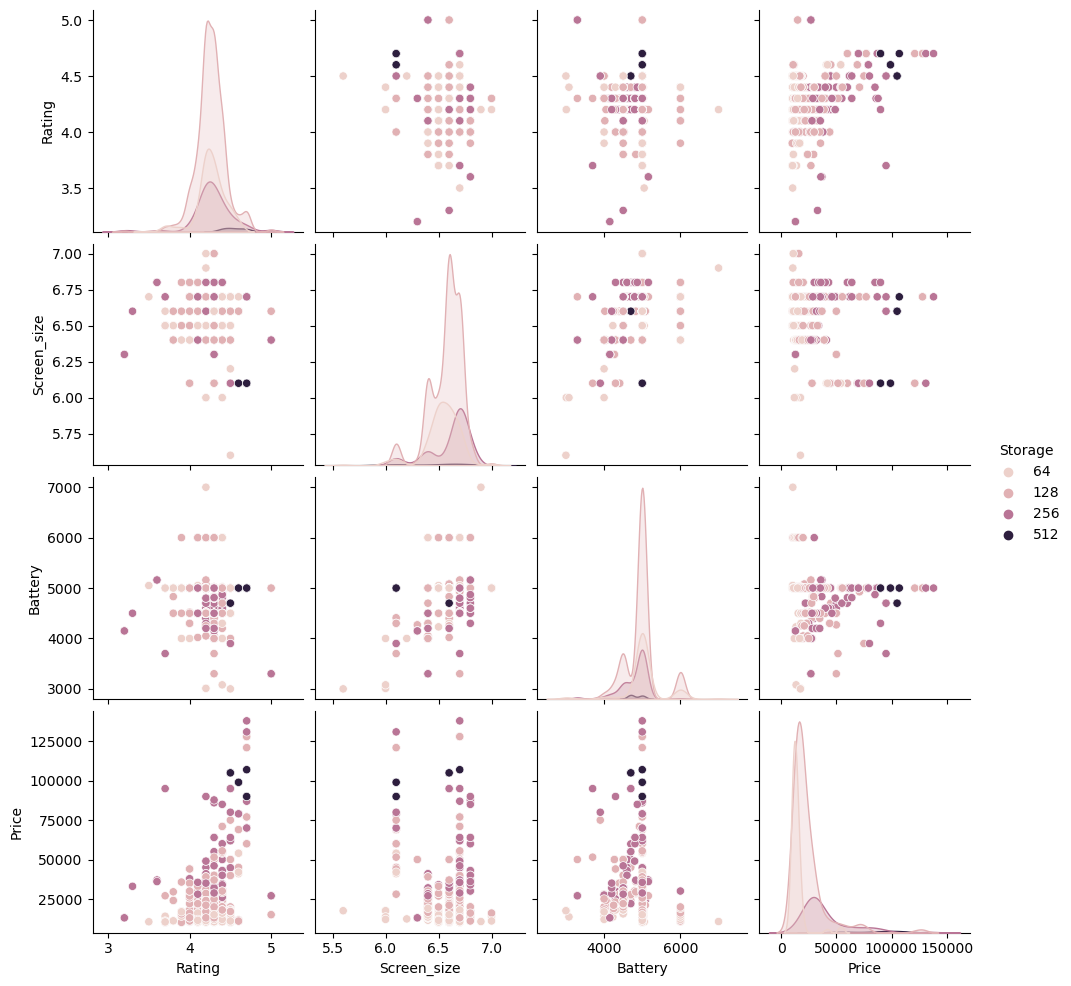

In [561]:
sns.pairplot(phones,hue="Storage")

In [571]:
phones["Price_cat"].unique()

array(['Affordable', 'Costly', 'Average'], dtype=object)

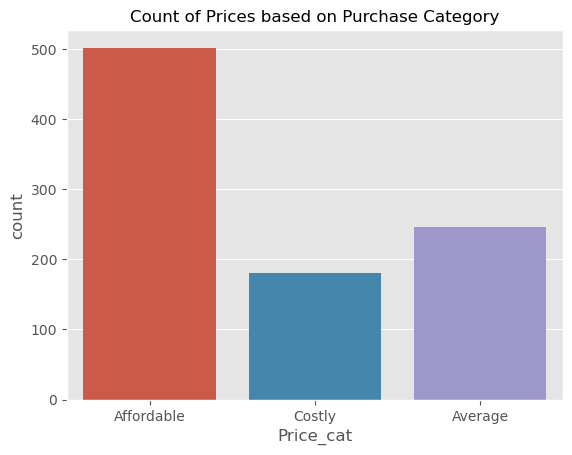

In [573]:
plt.style.use("ggplot")
sns.countplot(x=phones["Price_cat"])
plt.title("Count of Prices based on Purchase Category",{"fontsize":12})
plt.show()


In [585]:
phones["Brand"].nunique()

20

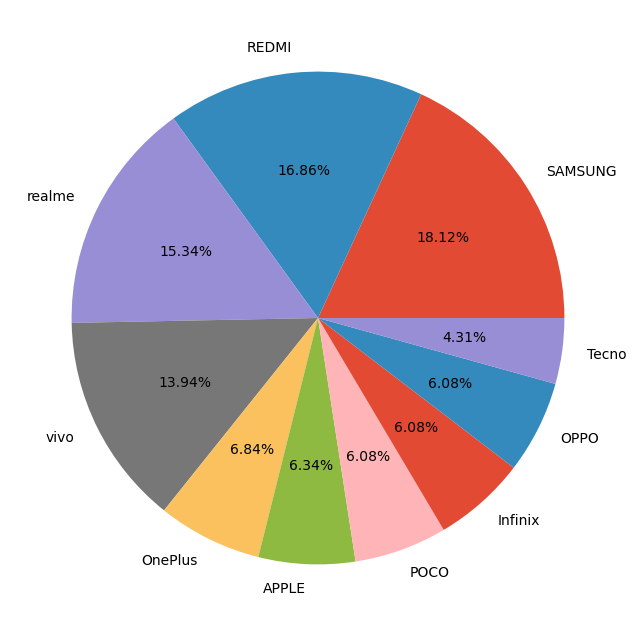

In [589]:
plt.figure(figsize=(8,8))
plt.pie(phones["Brand"].value_counts()[:10],labels=phones["Brand"].value_counts()[:10].index,autopct="%0.2f%%")
plt.show()

In [611]:
import plotly.express as px

fig = px.pie( values=phones["Brand"].value_counts()[:10], names=phones["Brand"].value_counts()[:10].index)
fig.show()

In [603]:
phones[(phones["Brand"]=="APPLE")  & (phones["Color"]=="Black") & (phones["Storage"]==128) & (phones["Rating"]>4.5) & (phones["Screen_size"]>6)]

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat,Price_cat
321,APPLE,Black,128,4.6,6.1,5000,44999,high,Costly
628,APPLE,Black,128,4.7,6.7,5000,127999,high,Costly
645,APPLE,Black,128,4.7,6.1,5000,120999,high,Costly


In [604]:
phones.to_csv("phones.csv")

In [609]:
def filter_(Brand):
    return phones[phones["Brand"]==Brand]

In [610]:
filter_("APPLE")

,Brand,Color,Storage,Rating,Screen_size,Battery,Price,Rating_cat,Price_cat
16,APPLE,Midnight,128,4.6,6.1,5000,68999,high,Costly
32,APPLE,Purple,128,4.6,6.1,5000,68999,high,Costly
36,APPLE,Starlight,128,4.6,6.1,5000,68999,high,Costly
71,APPLE,Midnight,128,4.7,6.1,5000,59999,high,Costly
95,APPLE,Blue,128,4.6,6.1,5000,68999,high,Costly
101,APPLE,Midnight,128,4.7,6.1,5000,59999,high,Costly
110,APPLE,Starlight,128,4.7,6.1,5000,59999,high,Costly
126,APPLE,Green,128,4.7,6.1,5000,59999,high,Costly
158,APPLE,Blue,128,4.7,6.1,5000,59999,high,Costly
168,APPLE,Pink,128,4.7,6.1,5000,59999,high,Costly
